In [ ]:
!git clone https://github.com/AjinkyaGhadge/PCA-from-scratch-in-Python.git

Cloning into 'PCA-from-scratch-in-Python'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 2), reused 19 (delta 2), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = np.load("X_train.npy")
y = np.load("y_train.npy")

In [ ]:
X.shape

(10000, 784)

In [ ]:
X[0].shape

(784,)

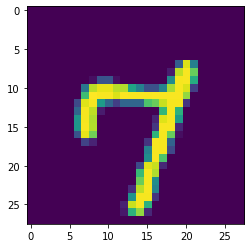

In [ ]:
plt.imshow(X[0].reshape(28, 28))

In [ ]:
mean = np.mean(X, axis= 0).reshape(-1, 1)


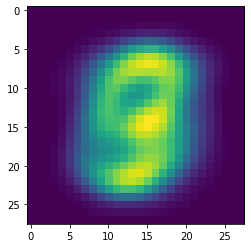

In [ ]:
plt.imshow(mean.reshape(28,28))

In [ ]:
S = (X - mean.T).T @ (X - mean.T)
S.shape

(784, 784)

In [ ]:
S

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
np.cov(X - mean.T, rowvar = 0) # S

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(S) # D, U

In [ ]:
eig_vals.shape

(784,)

In [ ]:
eig_vecs.shape

(784, 784)

In [ ]:
eigen_values_sorted = np.argsort(-eig_vals)
eig_vals[eigen_values_sorted]

array([ 4.96837969e+04,  3.63776367e+04,  3.25572285e+04,  2.82821426e+04,
        2.58972930e+04,  2.28644766e+04,  1.72061113e+04,  1.54129219e+04,
        1.45388818e+04,  1.23575000e+04,  1.08158408e+04,  1.05118652e+04,
        9.05547656e+03,  8.92816504e+03,  8.15907178e+03,  7.93650586e+03,
        7.02684326e+03,  6.83241992e+03,  6.22418213e+03,  5.99463672e+03,
        5.63807471e+03,  5.33259717e+03,  5.02085840e+03,  4.81747656e+03,
        4.75154004e+03,  4.35178271e+03,  4.29119434e+03,  4.14211279e+03,
        3.94324219e+03,  3.69595605e+03,  3.47917407e+03,  3.43290063e+03,
        3.19239502e+03,  3.07498145e+03,  3.06427173e+03,  2.87531299e+03,
        2.71168823e+03,  2.58879492e+03,  2.56574341e+03,  2.53060352e+03,
        2.41914209e+03,  2.32304004e+03,  2.23442700e+03,  2.09623682e+03,
        2.02665845e+03,  2.00280798e+03,  1.90440332e+03,  1.85633850e+03,
        1.77403235e+03,  1.75797595e+03,  1.70465991e+03,  1.64492322e+03,
        1.55211011e+03,  

In [ ]:
sum = 0
count = 0
for i, val in enumerate(eig_vals[eigen_values_sorted]):
  sum += val
  if (sum / np.sum(eig_vals)) >= 0.9:
    count = i
    break

In [ ]:
count

86

In [ ]:
X_pca = (X - mean.T) @ eig_vecs[:, eigen_values_sorted[:86]]
X_pca.shape

(10000, 86)

In [ ]:
X_recover = mean.T + X_pca @ eig_vecs[:, eigen_values_sorted[:86]].T
X_recover.shape

(10000, 784)

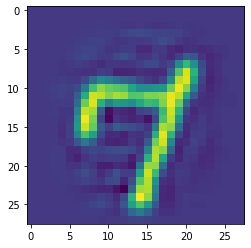

In [ ]:
plt.imshow(X_recover[0].reshape(28, 28))

# SVD

In [ ]:
Z = X - mean.T
Z.shape

(10000, 784)

In [ ]:
u, s, vT = np.linalg.svd(Z)

In [ ]:
v = vT.T
v.shape

(784, 784)

In [ ]:
s.shape

(784,)

In [ ]:
sum = 0
count = 0
for i, val in enumerate(s):
  sum += val
  if (sum / np.sum(s)) >= 0.9:
    count = i
    break

In [ ]:
X_svd = Z @ v[:,:365]
X_svd.shape

(10000, 365)

In [ ]:
X_recover_svd = mean.T + X_svd @ v[:, :365].T
X_recover_svd.shape

(10000, 784)

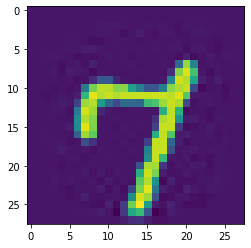

In [ ]:
plt.imshow(X_recover_svd[0].reshape(28, 28))